In [ ]:
import torch

In [ ]:
# Створення двох тензорів розміром 2x2
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])

# Створення тензора третього порядку (3D тензор) розміром 2x2x2
c = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

In [ ]:
a

tensor([[1, 2],
        [3, 4]])

In [ ]:
b

tensor([[5, 6],
        [7, 8]])

In [ ]:
c

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])

In [ ]:
a + b

tensor([[ 6,  8],
        [10, 12]])

In [ ]:
a*b

tensor([[ 5, 12],
        [21, 32]])

In [ ]:
scalar = 2
a * scalar

tensor([[2, 4],
        [6, 8]])

In [ ]:
v1 = torch.tensor([1, 2])
v2 = torch.tensor([3, 4])

# Тензорний добуток векторів v1 і v2
torch.ger(v1, v2)

tensor([[3, 4],
        [6, 8]])

In [ ]:
a.t()

tensor([[1, 3],
        [2, 4]])

In [ ]:
# Множення тензора третього порядку C на вектор v1 за індексом (скорочення тензора)
v = torch.tensor([1, 2])
j = torch.tensordot(c, v, dims=([2], [0]))
j

tensor([[ 5, 11],
        [17, 23]])

In [ ]:
# Поелементна сума тензора A
torch.sum(a)

tensor(10)

In [ ]:
# Поелементна сума вздовж осі (для матриці це сума по рядках або стовпцях)
torch.sum(a, dim=0)  # Сума по стовпцях

tensor([4, 6])

НЕЙРОННІ МЕРЕЖІ

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Завантаження та попередня обробка даних MNIST
from tensorflow.keras.datasets import mnist

# Завантажуємо дані
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Нормалізація даних
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

In [ ]:
# Створення моделі
model = Sequential()

# Додаємо шари
model.add(Dense(128, activation='relu', input_shape=(28*28,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Вихідний шар для 10 класів

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Компіляція моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Навчання моделі
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8783 - loss: 0.4218 - val_accuracy: 0.9612 - val_loss: 0.1242
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9671 - loss: 0.1069 - val_accuracy: 0.9663 - val_loss: 0.1090
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9772 - loss: 0.0711 - val_accuracy: 0.9709 - val_loss: 0.0939
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9849 - loss: 0.0490 - val_accuracy: 0.9750 - val_loss: 0.0844
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9867 - loss: 0.0415 - val_accuracy: 0.9778 - val_loss: 0.0785
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9901 - loss: 0.0301 - val_accuracy: 0.9773 - val_loss: 0.0823
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9906 - loss: 0.0264 - val_accuracy: 0.9736 - val_loss: 0.1043
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9923 - loss: 0.0217

In [ ]:
# Оцінка моделі
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Тестова точність: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9746 - loss: 0.1075
Тестова точність: 0.9785000085830688


In [ ]:
# Збереження моделі
model.save("mnist_model.h5")

# Завантаження моделі
new_model = tf.keras.models.load_model("mnist_model.h5")

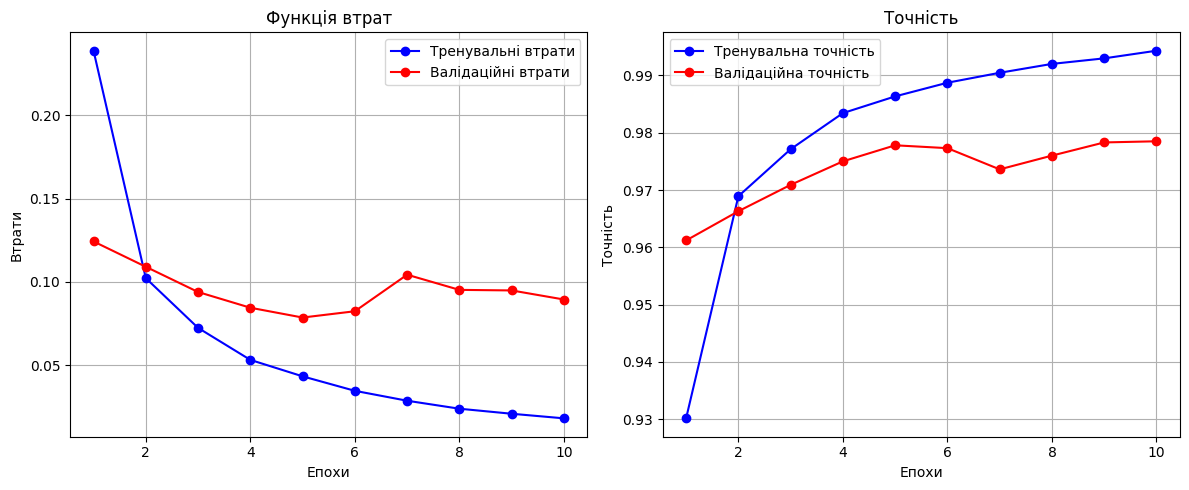

In [ ]:
import matplotlib.pyplot as plt

# Отримання даних з історії тренування
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# Побудова графіків
plt.figure(figsize=(12, 5))

# Графік функції втрат
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Тренувальні втрати')
plt.plot(epochs, val_loss, 'ro-', label='Валідаційні втрати')
plt.title('Функція втрат')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo-', label='Тренувальна точність')
plt.plot(epochs, val_accuracy, 'ro-', label='Валідаційна точність')
plt.title('Точність')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()

# Відображення графіків
plt.tight_layout()
plt.show()

Керас тюнер

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 7.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner import HyperModel, RandomSearch

<ipython-input-12-2c9df48e3fba>:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel, RandomSearch


In [ ]:
# Завантаження набору даних MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

Визначення гіперпараметрів

In [ ]:
# Визначення моделі з гіперпараметрами
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = keras.Sequential()
        model.add(layers.Flatten(input_shape=(28, 28)))

        # Гіперпараметри для кількості нейронів у шарах
        for i in range(hp.Int('num_layers', 1, 3)):  # Заміна на hp.Int()
            model.add(layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32), activation='relu'))

        model.add(layers.Dense(10, activation='softmax'))

        # Гіперпараметр для оптимізатора
        model.compile(
            optimizer=hp.Choice('optimizer', values=['adam', 'sgd']),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )

        return model

Налаштування гіперпараметрів

In [ ]:
# Налаштування гіперпараметрів
tuner = RandomSearch(
    MyHyperModel(),
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='helloworld'
)

In [ ]:
tuner.search(x_train, y_train, epochs=5, validation_split=0.2)

Trial 10 Complete [00h 01m 26s]
val_accuracy: 0.9737499952316284

Best val_accuracy So Far: 0.9748333096504211
Total elapsed time: 00h 10m 52s


Отримання найкращої моделі

In [ ]:
# Отримання найкращої моделі
best_model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


КЕРАС. ПОБУДОВА НЕЙРОННОЇ МЕРЕЖІ

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0  # Нормалізація
x_test = x_test.astype('float32') / 255.0      # Нормалізація

In [ ]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Вхідний шар
    layers.Dense(128, activation='relu'),   # Перший схований шар
    layers.Dense(10, activation='softmax')  # Вихідний шар
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8647 - loss: 0.4787 - val_accuracy: 0.9557 - val_loss: 0.1570
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9612 - loss: 0.1343 - val_accuracy: 0.9682 - val_loss: 0.1114
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9740 - loss: 0.0905 - val_accuracy: 0.9687 - val_loss: 0.1057
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9810 - loss: 0.0635 - val_accuracy: 0.9715 - val_loss: 0.0948
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9855 - loss: 0.0469 - val_accuracy: 0.9737 - val_loss: 0.0863


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9724 - loss: 0.0943
Test accuracy: 0.98
